In [629]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import cv2 as cv
import os
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.regularizers import l2
from keras import regularizers
from tensorflow.keras.optimizers import  SGD, Adam, RMSprop

## Loading the Data and Displaying it

In [630]:
df = pd.read_csv('train.csv.zip', index_col='id')
df.head()

species   margin1   margin2   margin3   margin4   margin5  \
id                                                                            
1             Acer_Opalus  0.007812  0.023438  0.023438  0.003906  0.011719   
2   Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625  0.025391   
3    Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812  0.003906   
5         Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859  0.021484   
6      Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766  0.013672   

     margin6   margin7  margin8   margin9  ...  texture55  texture56  \
id                                         ...                         
1   0.009766  0.027344      0.0  0.001953  ...   0.007812   0.000000   
2   0.001953  0.019531      0.0  0.000000  ...   0.000977   0.000000   
3   0.005859  0.068359      0.0  0.000000  ...   0.154300   0.000000   
5   0.019531  0.023438      0.0  0.013672  ...   0.000000   0.000977   
6   0.015625  0.005859      0.0  0.000000  ...   0.096680   0.000000   

    texture57  texture58  texture59  texture60  texture61  texture62  \
id                                                                     
1    0.002930   0.002930   0.035156        0.0        0.0   0.004883   
2    0.000000   0.000977   0.023438        0.0        0.0   0.000977   
3    0.005859   0.000977   0.007812        0.0        0.0   0.000000   
5    0.000000   0.000000   0.020508        0.0        0.0   0.017578   
6    0.021484   0.000000   0.000000        0.0        0.0   0.000000   

    texture63  texture64  
id                        
1    0.000000   0.025391  
2    0.039062   0.022461  
3    0.020508   0.002930  
5    0.000000   0.047852  
6    0.000000   0.031250  

[5 rows x 193 columns]

In [631]:
df1 = pd.read_csv('test.csv.zip',  index_col=False)
df1.reset_index(drop = True, inplace=True)
df1.head()

id   margin1   margin2   margin3   margin4   margin5   margin6   margin7  \
0   4  0.019531  0.009766  0.078125  0.011719  0.003906  0.015625  0.005859   
1   7  0.007812  0.005859  0.064453  0.009766  0.003906  0.013672  0.007812   
2   9  0.000000  0.000000  0.001953  0.021484  0.041016  0.000000  0.023438   
3  12  0.000000  0.000000  0.009766  0.011719  0.017578  0.000000  0.003906   
4  13  0.001953  0.000000  0.015625  0.009766  0.039062  0.000000  0.009766   

   margin8   margin9  ...  texture55  texture56  texture57  texture58  \
0      0.0  0.005859  ...   0.006836   0.000000   0.015625   0.000977   
1      0.0  0.033203  ...   0.000000   0.000000   0.006836   0.001953   
2      0.0  0.011719  ...   0.128910   0.000000   0.000977   0.000000   
3      0.0  0.003906  ...   0.012695   0.015625   0.002930   0.036133   
4      0.0  0.005859  ...   0.000000   0.042969   0.016602   0.010742   

   texture59  texture60  texture61  texture62  texture63  texture64  
0   0.015625        0.0        0.0   0.000000   0.003906   0.053711  
1   0.013672        0.0        0.0   0.000977   0.037109   0.044922  
2   0.000000        0.0        0.0   0.015625   0.000000   0.000000  
3   0.013672        0.0        0.0   0.089844   0.000000   0.008789  
4   0.041016        0.0        0.0   0.007812   0.009766   0.007812  

[5 rows x 193 columns]

In [632]:
df.shape

(990, 193)

In [633]:
df1.shape

(594, 193)

## Describe the Data

In [634]:
df.describe()

margin1     margin2     margin3     margin4     margin5     margin6  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  990.000000   
mean     0.017412    0.028539    0.031988    0.023280    0.014264    0.038579   
std      0.019739    0.038855    0.025847    0.028411    0.018390    0.052030   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.001953    0.001953    0.013672    0.005859    0.001953    0.000000   
50%      0.009766    0.011719    0.025391    0.013672    0.007812    0.015625   
75%      0.025391    0.041016    0.044922    0.029297    0.017578    0.056153   
max      0.087891    0.205080    0.156250    0.169920    0.111330    0.310550   

          margin7     margin8     margin9    margin10  ...   texture55  \
count  990.000000  990.000000  990.000000  990.000000  ...  990.000000   
mean     0.019202    0.001083    0.007167    0.018639  ...    0.036501   
std      0.017511    0.002743    0.008933    0.016071  ...    0.063403   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.005859    0.000000    0.001953    0.005859  ...    0.000000   
50%      0.015625    0.000000    0.005859    0.015625  ...    0.004883   
75%      0.029297    0.000000    0.007812    0.027344  ...    0.043701   
max      0.091797    0.031250    0.076172    0.097656  ...    0.429690   

        texture56   texture57   texture58   texture59   texture60   texture61  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  990.000000   
mean     0.005024    0.015944    0.011586    0.016108    0.014017    0.002688   
std      0.019321    0.023214    0.025040    0.015335    0.060151    0.011415   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000977    0.000000    0.004883    0.000000    0.000000   
50%      0.000000    0.005859    0.000977    0.012695    0.000000    0.000000   
75%      0.000000    0.022217    0.009766    0.021484    0.000000    0.000000   
max      0.202150    0.172850    0.200200    0.106450    0.578130    0.151370   

        texture62   texture63   texture64  
count  990.000000  990.000000  990.000000  
mean     0.020291    0.008989    0.019420  
std      0.039040    0.013791    0.022768  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000977  
50%      0.003906    0.002930    0.011719  
75%      0.023438    0.012695    0.029297  
max      0.375980    0.086914    0.141600  

[8 rows x 192 columns]

In [635]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 1 to 1584
Columns: 193 entries, species to texture64
dtypes: float64(192), object(1)
memory usage: 1.5+ MB


In [636]:
#check the nulls
df.isna().sum().sum()

0

In [637]:
#check the dublicates
df.duplicated().sum()

0

In [638]:
df['species'].value_counts()

Lithocarpus_Cleistocarpus    10
Populus_Grandidentata        10
Eucalyptus_Neglecta          10
Tilia_Oliveri                10
Acer_Pictum                  10
                             ..
Quercus_Coccifera            10
Betula_Pendula               10
Ilex_Cornuta                 10
Quercus_Agrifolia            10
Acer_Platanoids              10
Name: species, Length: 99, dtype: int64

In [639]:
df['species'].nunique()

99

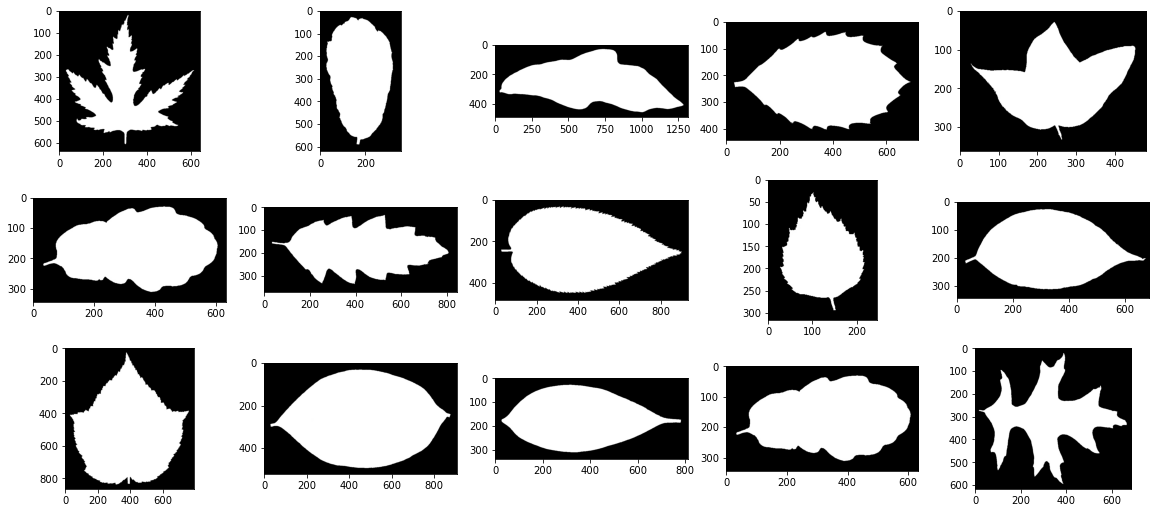

In [640]:
plt.figure(figsize=(20,15))
for i in range(15):
   file=np.random.choice((os.listdir('C:/images/images')))
   plt.subplot(5,5,i+1) # 5 images in each row
   img=load_img(os.path.join('C:/images/images',file))
   plt.imshow(img)

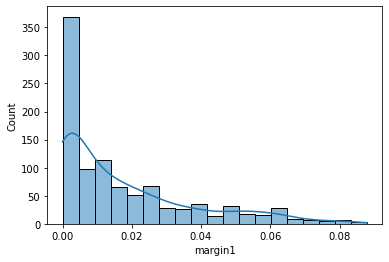

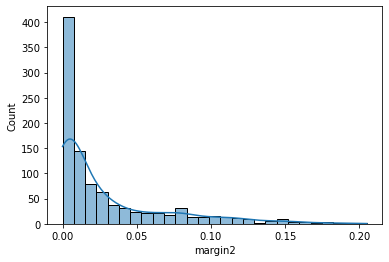

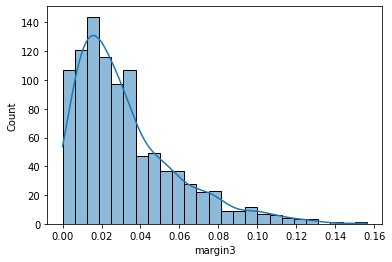

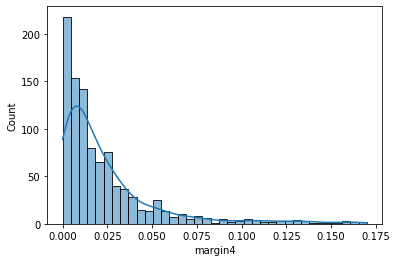

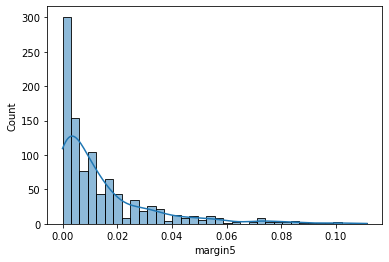

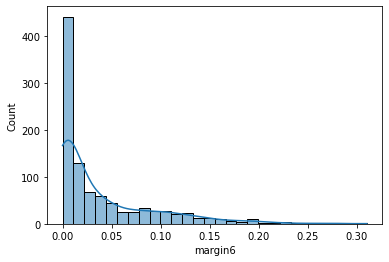

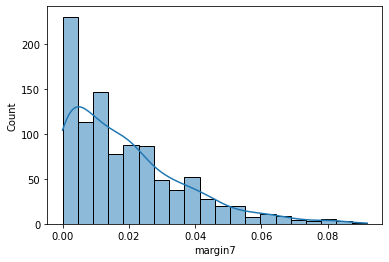

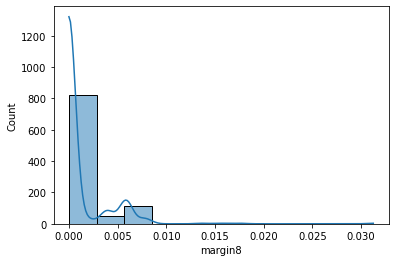

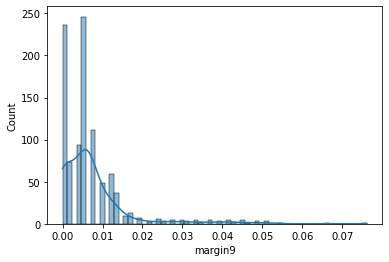

In [641]:
M = ['margin1','margin2','margin3','margin4','margin5','margin6','margin7','margin8','margin9']
for i in M:
    sns.histplot(df[i], kde=True)
    plt.show()

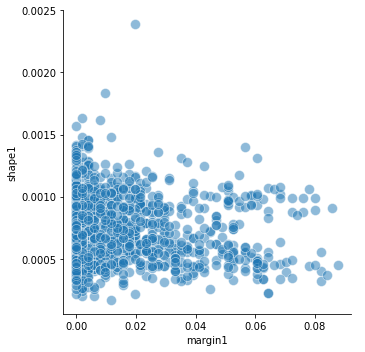

In [642]:
g = sns.FacetGrid(df,height=5) #hue="species", height=5)
g.map(sns.scatterplot, "margin1", "shape1", s=100, alpha=.5)
g.add_legend()

## correlation Analysis

In [643]:
df.corr()

margin1   margin2   margin3   margin4   margin5   margin6  \
margin1    1.000000  0.806390 -0.182829 -0.297807 -0.475874  0.767718   
margin2    0.806390  1.000000 -0.204640 -0.315953 -0.444312  0.825762   
margin3   -0.182829 -0.204640  1.000000  0.120042 -0.185007 -0.163976   
margin4   -0.297807 -0.315953  0.120042  1.000000  0.029480 -0.261437   
margin5   -0.475874 -0.444312 -0.185007  0.029480  1.000000 -0.438587   
...             ...       ...       ...       ...       ...       ...   
texture60  0.035072  0.081069 -0.019850 -0.052317  0.006542  0.066262   
texture61 -0.007581 -0.007057  0.084957  0.320644 -0.109229 -0.050498   
texture62 -0.033159 -0.037405 -0.081999 -0.073886  0.151675 -0.031555   
texture63 -0.075171 -0.098957 -0.148193  0.050970  0.022299 -0.132087   
texture64  0.030414 -0.029532  0.061780  0.014343 -0.148834 -0.003164   

            margin7   margin8   margin9  margin10  ...  texture55  texture56  \
margin1    0.066273 -0.094137 -0.181496  0.397138  ...   0.137158  -0.047771   
margin2   -0.083273 -0.086428 -0.120276  0.162587  ...   0.154407  -0.021096   
margin3    0.095449  0.024350 -0.000042  0.008772  ...   0.047347  -0.027618   
margin4   -0.268271 -0.047693  0.227543 -0.173986  ...  -0.071974  -0.009537   
margin5   -0.108178  0.056557  0.196745 -0.320647  ...  -0.165622   0.059135   
...             ...       ...       ...       ...  ...        ...        ...   
texture60 -0.034094  0.048647 -0.028292  0.020376  ...  -0.129365   0.004412   
texture61 -0.163375 -0.079283  0.088517 -0.127373  ...  -0.002235   0.053707   
texture62  0.015391 -0.048843 -0.031954 -0.014200  ...  -0.217239   0.171577   
texture63 -0.001364  0.027758 -0.119494 -0.039193  ...  -0.207887   0.002057   
texture64  0.068512 -0.003191 -0.097760  0.065964  ...  -0.095205  -0.095913   

           texture57  texture58  texture59  texture60  texture61  texture62  \
margin1     0.126227  -0.024139  -0.168201   0.035072  -0.007581  -0.033159   
margin2     0.123834  -0.063654  -0.157842   0.081069  -0.007057  -0.037405   
margin3     0.007261  -0.021390   0.033505  -0.019850   0.084957  -0.081999   
margin4    -0.050529  -0.044318   0.088857  -0.052317   0.320644  -0.073886   
margin5     0.012938   0.155327   0.149420   0.006542  -0.109229   0.151675   
...              ...        ...        ...        ...        ...        ...   
texture60  -0.155187   0.240704  -0.183369   1.000000  -0.051838   0.265879   
texture61  -0.072814  -0.084638  -0.023539  -0.051838   1.000000  -0.063582   
texture62  -0.283316   0.563088  -0.128010   0.265879  -0.063582   1.000000   
texture63  -0.064724  -0.059866   0.156568  -0.089679  -0.068065  -0.058189   
texture64   0.224686  -0.269157  -0.015374  -0.190194   0.036374  -0.245527   

           texture63  texture64  
margin1    -0.075171   0.030414  
margin2    -0.098957  -0.029532  
margin3    -0.148193   0.061780  
margin4     0.050970   0.014343  
margin5     0.022299  -0.148834  
...              ...        ...  
texture60  -0.089679  -0.190194  
texture61  -0.068065   0.036374  
texture62  -0.058189  -0.245527  
texture63   1.000000   0.029305  
texture64   0.029305   1.000000  

[192 rows x 192 columns]

In [644]:
data_cor=df.drop(columns=['species'])

In [645]:
data_marg=df.iloc[:,:64]
data_shape=df.iloc[:,64:128]
data_texture=df.iloc[:,128:]

In [646]:
data_marg.corr()

margin1   margin2   margin3   margin4   margin5   margin6  \
margin1   1.000000  0.806390 -0.182829 -0.297807 -0.475874  0.767718   
margin2   0.806390  1.000000 -0.204640 -0.315953 -0.444312  0.825762   
margin3  -0.182829 -0.204640  1.000000  0.120042 -0.185007 -0.163976   
margin4  -0.297807 -0.315953  0.120042  1.000000  0.029480 -0.261437   
margin5  -0.475874 -0.444312 -0.185007  0.029480  1.000000 -0.438587   
...            ...       ...       ...       ...       ...       ...   
margin59 -0.217283 -0.216703  0.475615  0.715344 -0.198879 -0.201793   
margin60 -0.150934 -0.113863 -0.193771  0.376115  0.423417 -0.157206   
margin61 -0.178541 -0.168219 -0.026549  0.006269  0.092988 -0.185521   
margin62 -0.315746 -0.286604 -0.240234 -0.147651  0.191698 -0.289598   
margin63  0.440114  0.325263  0.433042 -0.178366 -0.496715  0.374743   

           margin7   margin8   margin9  margin10  ...  margin54  margin55  \
margin1   0.066273 -0.094137 -0.181496  0.397138  ... -0.442415 -0.215142   
margin2  -0.083273 -0.086428 -0.120276  0.162587  ... -0.397171 -0.262892   
margin3   0.095449  0.024350 -0.000042  0.008772  ... -0.158799  0.097771   
margin4  -0.268271 -0.047693  0.227543 -0.173986  ...  0.032300 -0.246734   
margin5  -0.108178  0.056557  0.196745 -0.320647  ...  0.792451  0.047905   
...            ...       ...       ...       ...  ...       ...       ...   
margin59 -0.220819 -0.084506  0.164687 -0.172359  ... -0.118749 -0.200380   
margin60 -0.230205  0.009347  0.312777 -0.223173  ...  0.265794 -0.238830   
margin61  0.033689  0.069657  0.132667 -0.100743  ...  0.109134  0.088716   
margin62 -0.145125  0.073288  0.196910 -0.277185  ...  0.268428 -0.020409   
margin63  0.112598 -0.021399 -0.075627  0.310261  ... -0.476861 -0.084027   

          margin56  margin57  margin58  margin59  margin60  margin61  \
margin1  -0.429318  0.279170  0.260683 -0.217283 -0.150934 -0.178541   
margin2  -0.389124  0.010321  0.260829 -0.216703 -0.113863 -0.168219   
margin3  -0.234731  0.071139 -0.163235  0.475615 -0.193771 -0.026549   
margin4  -0.218347  0.017273  0.405733  0.715344  0.376115  0.006269   
margin5   0.407380 -0.263733 -0.434640 -0.198879  0.423417  0.092988   
...            ...       ...       ...       ...       ...       ...   
margin59 -0.287953 -0.049957  0.262313  1.000000  0.129818 -0.027089   
margin60 -0.158862 -0.186143  0.072994  0.129818  1.000000  0.038501   
margin61  0.076286 -0.110627 -0.136409 -0.027089  0.038501  1.000000   
margin62  0.472471 -0.262011 -0.312280 -0.213902  0.012798  0.252258   
margin63 -0.454529  0.331344  0.115314  0.102196 -0.272261 -0.102940   

          margin62  margin63  
margin1  -0.315746  0.440114  
margin2  -0.286604  0.325263  
margin3  -0.240234  0.433042  
margin4  -0.147651 -0.178366  
margin5   0.191698 -0.496715  
...            ...       ...  
margin59 -0.213902  0.102196  
margin60  0.012798 -0.272261  
margin61  0.252258 -0.102940  
margin62  1.000000 -0.363544  
margin63 -0.363544  1.000000  

[63 rows x 63 columns]

In [647]:
data_texture.corr()

shape64  texture1  texture2  texture3  texture4  texture5  \
shape64    1.000000 -0.006260  0.023794  0.025353  0.096577  0.009994   
texture1  -0.006260  1.000000 -0.067151 -0.079916 -0.115160 -0.143009   
texture2   0.023794 -0.067151  1.000000  0.260208 -0.065309  0.110914   
texture3   0.025353 -0.079916  0.260208  1.000000 -0.346551  0.283067   
texture4   0.096577 -0.115160 -0.065309 -0.346551  1.000000 -0.391381   
...             ...       ...       ...       ...       ...       ...   
texture60 -0.096818 -0.112472 -0.141218 -0.181973 -0.098065 -0.156409   
texture61 -0.173204 -0.029803 -0.121736  0.275601 -0.106833  0.047808   
texture62 -0.012569 -0.190008 -0.243517 -0.272880 -0.011305 -0.241493   
texture63  0.024816 -0.090583  0.086803  0.107869  0.039765 -0.180592   
texture64  0.038334  0.364567 -0.072817  0.117977 -0.025903 -0.202695   

           texture6  texture7  texture8  texture9  ...  texture55  texture56  \
shape64   -0.007388  0.049019  0.073126  0.024169  ...  -0.122013   0.007808   
texture1  -0.006856  0.637527 -0.103354 -0.068936  ...   0.088055  -0.097203   
texture2   0.259064 -0.041552  0.355421  0.390843  ...  -0.024664  -0.151590   
texture3   0.053647 -0.058573  0.539535  0.079338  ...   0.047347  -0.034369   
texture4  -0.025297 -0.039472 -0.395623 -0.077532  ...  -0.290311  -0.072844   
...             ...       ...       ...       ...  ...        ...        ...   
texture60 -0.044226 -0.170709 -0.176429 -0.064995  ...  -0.129365   0.004412   
texture61 -0.111720 -0.085592  0.014635 -0.124593  ...  -0.002235   0.053707   
texture62 -0.049642 -0.225021 -0.278322 -0.048505  ...  -0.217239   0.171577   
texture63  0.190450  0.007076 -0.043330  0.306404  ...  -0.207887   0.002057   
texture64  0.080423  0.471930 -0.078092 -0.076878  ...  -0.095205  -0.095913   

           texture57  texture58  texture59  texture60  texture61  texture62  \
shape64     0.076364  -0.031531   0.104200  -0.096818  -0.173204  -0.012569   
texture1    0.164526  -0.189653  -0.156847  -0.112472  -0.029803  -0.190008   
texture2    0.186293  -0.102880   0.294077  -0.141218  -0.121736  -0.243517   
texture3    0.208997  -0.304740   0.040444  -0.181973   0.275601  -0.272880   
texture4   -0.254080  -0.018632   0.183791  -0.098065  -0.106833  -0.011305   
...              ...        ...        ...        ...        ...        ...   
texture60  -0.155187   0.240704  -0.183369   1.000000  -0.051838   0.265879   
texture61  -0.072814  -0.084638  -0.023539  -0.051838   1.000000  -0.063582   
texture62  -0.283316   0.563088  -0.128010   0.265879  -0.063582   1.000000   
texture63  -0.064724  -0.059866   0.156568  -0.089679  -0.068065  -0.058189   
texture64   0.224686  -0.269157  -0.015374  -0.190194   0.036374  -0.245527   

           texture63  texture64  
shape64     0.024816   0.038334  
texture1   -0.090583   0.364567  
texture2    0.086803  -0.072817  
texture3    0.107869   0.117977  
texture4    0.039765  -0.025903  
...              ...        ...  
texture60  -0.089679  -0.190194  
texture61  -0.068065   0.036374  
texture62  -0.058189  -0.245527  
texture63   1.000000   0.029305  
texture64   0.029305   1.000000  

[65 rows x 65 columns]

In [648]:
data_shape.corr()

margin64    shape1    shape2    shape3    shape4    shape5  \
margin64  1.000000  0.025202  0.023915  0.024520  0.029757  0.033888   
shape1    0.025202  1.000000  0.988172  0.963959  0.928501  0.877043   
shape2    0.023915  0.988172  1.000000  0.989348  0.962662  0.919347   
shape3    0.024520  0.963959  0.989348  1.000000  0.988259  0.956976   
shape4    0.029757  0.928501  0.962662  0.988259  1.000000  0.987085   
...            ...       ...       ...       ...       ...       ...   
shape59   0.042717  0.764713  0.773647  0.786576  0.800567  0.801383   
shape60   0.046544  0.839619  0.843228  0.848003  0.850803  0.838388   
shape61   0.044927  0.899469  0.896762  0.892986  0.884192  0.858274   
shape62   0.037990  0.940542  0.931919  0.920399  0.901089  0.863891   
shape63   0.031708  0.968368  0.953427  0.933826  0.905258  0.858605   

            shape6    shape7    shape8    shape9  ...   shape54   shape55  \
margin64  0.032130  0.024161  0.014895  0.004090  ... -0.008922 -0.003302   
shape1    0.810337  0.729520  0.638556  0.547738  ...  0.336137  0.405195   
shape2    0.860438  0.786173  0.700551  0.612557  ...  0.371989  0.436357   
shape3    0.909099  0.844374  0.766872  0.684679  ...  0.422398  0.480511   
shape4    0.953611  0.902544  0.837043  0.763955  ...  0.488642  0.538664   
...            ...       ...       ...       ...  ...       ...       ...   
shape59   0.794075  0.773366  0.739716  0.699939  ...  0.776278  0.830946   
shape60   0.812828  0.772511  0.721736  0.667084  ...  0.689304  0.749407   
shape61   0.816432  0.759114  0.692876  0.626056  ...  0.596271  0.660532   
shape62   0.810602  0.741948  0.664575  0.587953  ...  0.508780  0.577118   
shape63   0.796615  0.720891  0.635869  0.551654  ...  0.425731  0.496670   

           shape56   shape57   shape58   shape59   shape60   shape61  \
margin64  0.006613  0.021822  0.032663  0.042717  0.046544  0.044927   
shape1    0.488552  0.579090  0.674746  0.764713  0.839619  0.899469   
shape2    0.514646  0.599656  0.689923  0.773647  0.843228  0.896762   
shape3    0.552228  0.630278  0.712478  0.786576  0.848003  0.892986   
shape4    0.601079  0.668467  0.739285  0.800567  0.850803  0.884192   
...            ...       ...       ...       ...       ...       ...   
shape59   0.890413  0.944170  0.983657  1.000000  0.984161  0.946870   
shape60   0.818132  0.885867  0.943021  0.984161  1.000000  0.985344   
shape61   0.736325  0.815540  0.887407  0.946870  0.985344  1.000000   
shape62   0.657990  0.744800  0.827454  0.899578  0.952775  0.987568   
shape63   0.580628  0.672660  0.763797  0.845754  0.909922  0.958438   

           shape62   shape63  
margin64  0.037990  0.031708  
shape1    0.940542  0.968368  
shape2    0.931919  0.953427  
shape3    0.920399  0.933826  
shape4    0.901089  0.905258  
...            ...       ...  
shape59   0.899578  0.845754  
shape60   0.952775  0.909922  
shape61   0.987568  0.958438  
shape62   1.000000  0.988180  
shape63   0.988180  1.000000  

[64 rows x 64 columns]

In [649]:
mean=X.mean()
standard_deviation=X.std()
zscores = [(value - mean) / standard_deviation for value in X]
zscores

[array([-0.12178249466926985, 0.5561890603368767, 0.5561890603368767,
        -0.2912536897194432, 0.04773208778363008, -0.037003509741456574,
        0.7256602553870499, -0.4607248847696165, -0.37598928724452985,
        0.9798670479623101, 0.13246768530871672, 0.3866744778839767,
        2.4204589806942365, -0.4607248847696165, 0.8103958529121366,
        -0.4607248847696165, 0.8951314504372233, 0.04773208778363008,
        -0.4607248847696165, 0.6409246578619633, 0.5561890603368767,
        -0.37598928724452985, -0.4607248847696165, 0.21720328283380338,
        -0.4607248847696165, 0.8951314504372233, -0.4607248847696165,
        0.13246768530871672, 0.8103958529121366, 0.21720328283380338,
        0.04773208778363008, -0.2912536897194432, 0.6409246578619633,
        -0.4607248847696165, -0.37598928724452985, 0.04773208778363008,
        -0.037003509741456574, 1.318852825465383, 1.1493382430124834,
        0.3866744778839767, -0.4607248847696165, -0.037003509741456574,
        0.471

## since there is a difference in mean and standard deviation we standarize the data

## Standardization

In [650]:
#scaling train data to be simpler
scaler = StandardScaler()
X= scaler.fit_transform(X)
# rescale test data
df1 = scaler.fit_transform(df1)

## Encode the labels

In [651]:
X= df.values[:,df.columns!='species']
#y=data['species']
y = LabelEncoder().fit_transform(df['species'])

In [652]:
df.shape,df1.shape, X.shape, y.shape

((990, 193), (594, 193), (990, 192), (990,))

## splitting the data into 80% for training and 20% for testing 

In [653]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [654]:
X_train.shape
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_train).astype(np.float32)

In [655]:
y_train.shape
y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_train).astype(np.float32)

In [671]:
def training(batch_size, hidden_size,opt, drop_out, reg, lr, epoch):
    model=Sequential()
    model.add(Dense(hidden_size,input_dim = 192,activation='tanh',kernel_regularizer=regularizers.l2(reg)))
    model.add(Dropout(drop_out))
    model.add(Dense(99, activation = 'softmax'))
    #opt = keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epoch,batch_size=batch_size)
    acc = history.history['accuracy']
    loss = history.history['loss']
    model.evaluate(X_test, y_test, verbose=1)
    plt.subplot(1, 2, 1)
    plt.plot(acc)
    plt.subplot(1, 2, 1)
    plt.plot(loss)
    plt.title('model loss & accuracy')
    plt.show()

## ADAM Optimizer

### 1st Trial

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 5.6328 - accuracy: 0.0316
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 5.1683 - accuracy: 0.0657
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 4.8902 - accuracy: 0.1465
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 4.7316 - accuracy: 0.1818
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 4.6408 - accuracy: 0.1932
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 4.5872 - accuracy: 0.1919
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 4.5510 - accuracy: 0.2033
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 4.5209 - accuracy: 0.2020
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 4.4908 - accuracy: 0.1995
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 4.4580 - accuracy: 0.2172
Epoch 11/

<ipython-input-671-4640affde6b2>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


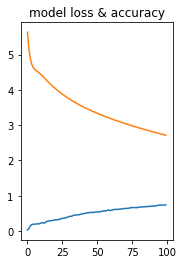

In [683]:
training(32,100,tf.keras.optimizers.Adam(learning_rate=0.001),0,0.01,0.001,100)   
#batch_size, hidden_size,opt, drop_out, reg, lr, epoch

### 2nd Trial

Epoch 1/100
13/13 [==============================] - 1s 7ms/step - loss: 5.3076 - accuracy: 0.0467
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 4.6125 - accuracy: 0.0657
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 4.2108 - accuracy: 0.1692
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 3.9121 - accuracy: 0.2980
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 3.6548 - accuracy: 0.3384
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 3.4398 - accuracy: 0.4003
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 3.2453 - accuracy: 0.5189
Epoch 8/100
13/13 [==============================] - 0s 7ms/step - loss: 3.0685 - accuracy: 0.5240
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 2.9491 - accuracy: 0.5606
Epoch 10/100
13/13 [==============================] - 0s 7ms/step - loss: 2.8393 - accuracy: 0.5758
Epoch 11/

<ipython-input-671-4640affde6b2>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


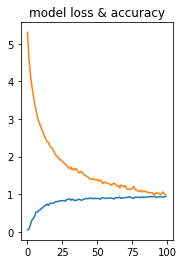

In [681]:
training(64,500,tf.keras.optimizers.Adam(learning_rate=0.01),0.01,0.01,0.01,100)    

### 3rd Trial

Epoch 1/100
13/13 [==============================] - 1s 8ms/step - loss: 4.8386 - accuracy: 0.1010
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 4.6398 - accuracy: 0.3939
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 4.4689 - accuracy: 0.4343
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 4.2776 - accuracy: 0.4886
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 4.0570 - accuracy: 0.5076
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 3.7985 - accuracy: 0.5101
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 3.5401 - accuracy: 0.5290
Epoch 8/100
13/13 [==============================] - 0s 7ms/step - loss: 3.2949 - accuracy: 0.5669
Epoch 9/100
13/13 [==============================] - 0s 8ms/step - loss: 3.0867 - accuracy: 0.5985
Epoch 10/100
13/13 [==============================] - 0s 8ms/step - loss: 2.9091 - accuracy: 0.6275
Epoch 11/

<ipython-input-671-4640affde6b2>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


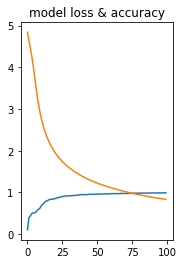

In [680]:
training(64,1092,tf.keras.optimizers.Adam(learning_rate=0.001),0.001,0.001,0.001,100)    

## SGD Optimizer

### 1st Trial

Epoch 1/200
50/50 [==============================] - 1s 4ms/step - loss: 4.5991 - accuracy: 0.0063
Epoch 2/200
50/50 [==============================] - 0s 4ms/step - loss: 4.5832 - accuracy: 0.0189
Epoch 3/200
50/50 [==============================] - 0s 4ms/step - loss: 4.5711 - accuracy: 0.0354
Epoch 4/200
50/50 [==============================] - 0s 4ms/step - loss: 4.5570 - accuracy: 0.0316
Epoch 5/200
50/50 [==============================] - 0s 4ms/step - loss: 4.5464 - accuracy: 0.0328
Epoch 6/200
50/50 [==============================] - 0s 4ms/step - loss: 4.5346 - accuracy: 0.0669
Epoch 7/200
50/50 [==============================] - 0s 4ms/step - loss: 4.5202 - accuracy: 0.0821
Epoch 8/200
50/50 [==============================] - 0s 4ms/step - loss: 4.5057 - accuracy: 0.0985
Epoch 9/200
50/50 [==============================] - 0s 4ms/step - loss: 4.4974 - accuracy: 0.0934
Epoch 10/200
50/50 [==============================] - 0s 4ms/step - loss: 4.4823 - accuracy: 0.1250
Epoch 11/

<ipython-input-671-4640affde6b2>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


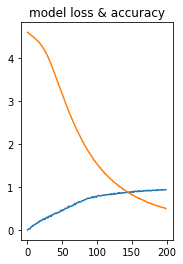

In [684]:
training(16,1092,tf.keras.optimizers.SGD(learning_rate=l),0.5,0,0.01,200)    
#training(batch_size, hidden_size,opt, drop_out, reg, lr, epoch)

### 2nd Trial

Epoch 1/200
50/50 [==============================] - 0s 2ms/step - loss: 4.5975 - accuracy: 0.0063
Epoch 2/200
50/50 [==============================] - 0s 2ms/step - loss: 4.5947 - accuracy: 0.0088
Epoch 3/200
50/50 [==============================] - 0s 2ms/step - loss: 4.5923 - accuracy: 0.0152
Epoch 4/200
50/50 [==============================] - 0s 2ms/step - loss: 4.5881 - accuracy: 0.0177
Epoch 5/200
50/50 [==============================] - 0s 2ms/step - loss: 4.5855 - accuracy: 0.0164
Epoch 6/200
50/50 [==============================] - 0s 2ms/step - loss: 4.5843 - accuracy: 0.0114
Epoch 7/200
50/50 [==============================] - 0s 2ms/step - loss: 4.5830 - accuracy: 0.0139
Epoch 8/200
50/50 [==============================] - 0s 2ms/step - loss: 4.5762 - accuracy: 0.0227
Epoch 9/200
50/50 [==============================] - 0s 2ms/step - loss: 4.5758 - accuracy: 0.0164
Epoch 10/200
50/50 [==============================] - 0s 2ms/step - loss: 4.5748 - accuracy: 0.0227
Epoch 11/

<ipython-input-671-4640affde6b2>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


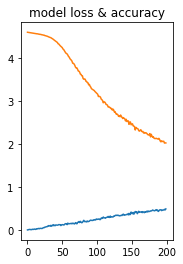

In [685]:
training(16,20,tf.keras.optimizers.SGD(learning_rate=l),0.5,0,0.001,200)    

### 3rd Trial

Epoch 1/200
50/50 [==============================] - 1s 4ms/step - loss: 4.6011 - accuracy: 0.0126
Epoch 2/200
50/50 [==============================] - 0s 4ms/step - loss: 4.5848 - accuracy: 0.0215
Epoch 3/200
50/50 [==============================] - 0s 3ms/step - loss: 4.5732 - accuracy: 0.0328
Epoch 4/200
50/50 [==============================] - 0s 3ms/step - loss: 4.5621 - accuracy: 0.0404
Epoch 5/200
50/50 [==============================] - 0s 3ms/step - loss: 4.5540 - accuracy: 0.0366
Epoch 6/200
50/50 [==============================] - 0s 3ms/step - loss: 4.5402 - accuracy: 0.0556
Epoch 7/200
50/50 [==============================] - 0s 3ms/step - loss: 4.5262 - accuracy: 0.0518
Epoch 8/200
50/50 [==============================] - 0s 4ms/step - loss: 4.5174 - accuracy: 0.0593
Epoch 9/200
50/50 [==============================] - 0s 3ms/step - loss: 4.5105 - accuracy: 0.0606
Epoch 10/200
50/50 [==============================] - 0s 4ms/step - loss: 4.4949 - accuracy: 0.0795
Epoch 11/

<ipython-input-671-4640affde6b2>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


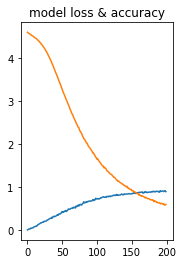

In [686]:
training(16,500,tf.keras.optimizers.SGD(learning_rate=l),0.6,0,0.001,200)    

### 4th Trial

Epoch 1/200
50/50 [==============================] - 1s 5ms/step - loss: 4.5997 - accuracy: 0.0038
Epoch 2/200
50/50 [==============================] - 0s 5ms/step - loss: 4.5843 - accuracy: 0.0139
Epoch 3/200
50/50 [==============================] - 0s 5ms/step - loss: 4.5708 - accuracy: 0.0265
Epoch 4/200
50/50 [==============================] - 0s 5ms/step - loss: 4.5574 - accuracy: 0.0354
Epoch 5/200
50/50 [==============================] - 0s 5ms/step - loss: 4.5458 - accuracy: 0.0404
Epoch 6/200
50/50 [==============================] - 0s 5ms/step - loss: 4.5342 - accuracy: 0.0631
Epoch 7/200
50/50 [==============================] - 0s 5ms/step - loss: 4.5215 - accuracy: 0.0657
Epoch 8/200
50/50 [==============================] - 0s 5ms/step - loss: 4.5115 - accuracy: 0.0972
Epoch 9/200
50/50 [==============================] - 0s 5ms/step - loss: 4.4933 - accuracy: 0.0947
Epoch 10/200
50/50 [==============================] - 0s 5ms/step - loss: 4.4848 - accuracy: 0.0859
Epoch 11/

<ipython-input-671-4640affde6b2>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


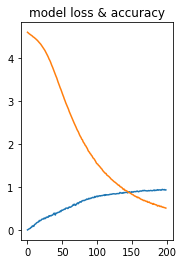

In [687]:
training(16,1092,tf.keras.optimizers.SGD(learning_rate=l),0.5,0,0.001,200)    

### 5th Trial

In [ ]:
training(16,50,tf.keras.optimizers.SGD(learning_rate=l),0.05,0,0.001,200)    

## SGD works well with small batch size and large epoches

## RMSProb Optimizer 

### 1st Trial

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 8.6338 - accuracy: 0.0480
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 4.2796 - accuracy: 0.1654
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 3.9047 - accuracy: 0.2715
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 4.1543 - accuracy: 0.3030
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 4.0139 - accuracy: 0.3321
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 3.8964 - accuracy: 0.3990
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 3.6525 - accuracy: 0.4583
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 3.7071 - accuracy: 0.4596
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 3.8165 - accuracy: 0.4924
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 3.8351 - accuracy: 0.4924
Epoch 11/

<ipython-input-671-4640affde6b2>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


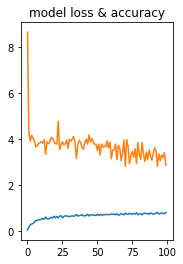

In [688]:
training(32,100,tf.keras.optimizers.RMSprop(learning_rate=l),0,0.001,0.001,100)    

### 2nd Trial

Epoch 1/100
13/13 [==============================] - 1s 7ms/step - loss: 55.7170 - accuracy: 0.0152
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 33.8672 - accuracy: 0.0568
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 17.6444 - accuracy: 0.1162
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 13.6519 - accuracy: 0.2109
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 14.7338 - accuracy: 0.2260
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 14.2259 - accuracy: 0.2336
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 15.3803 - accuracy: 0.2816
Epoch 8/100
13/13 [==============================] - 0s 9ms/step - loss: 13.8161 - accuracy: 0.3485
Epoch 9/100
13/13 [==============================] - 0s 7ms/step - loss: 15.3563 - accuracy: 0.3018
Epoch 10/100
13/13 [==============================] - 0s 7ms/step - loss: 10.0168 - accuracy: 0.5328

<ipython-input-671-4640affde6b2>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


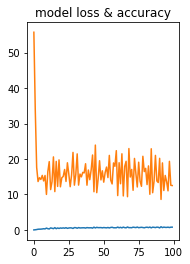

In [707]:
training(64,500,tf.keras.optimizers.RMSprop(learning_rate=l),0.001,0.001,0.01,100)    
#training(batch_size, hidden_size,opt, drop_out, reg, lr, epoch):

### 3rd Trial

Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 35.0552 - accuracy: 0.0253
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 17.6730 - accuracy: 0.1048
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 13.9664 - accuracy: 0.2033
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 12.0210 - accuracy: 0.2753
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 14.1448 - accuracy: 0.2740
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 14.0308 - accuracy: 0.3434
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 13.8390 - accuracy: 0.3586
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 13.2583 - accuracy: 0.3927
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 13.5934 - accuracy: 0.4104
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 14.0503 - accuracy: 0.4205

<ipython-input-671-4640affde6b2>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


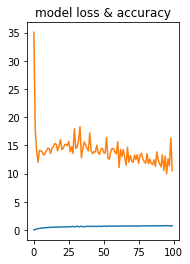

In [693]:
training(32,400,tf.keras.optimizers.RMSprop(learning_rate=l),0.01,0.001,0.01,100)    